#**Group 10 Data Collection**

---



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import random 
import time

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd '/content/gdrive/My Drive/Group_10_CV_Project'

[Errno 2] No such file or directory: '/content/gdrive/My Drive/Group_10_CV_Project'
/content


In [ ]:
def load_dataset(path, label_path, num_images, shuffle=True, is_color=False):    
    data = []
    labels = []
    labels_dict = {}
        
    #Get img filenames
    img_paths = glob.glob(path + '/*')
    #Process label .txt file into array of strings
    label_file = open(label_path, 'r')
    lines = label_file.readlines()

    #Create label dictionary: Key = filename, value = label
    for line in lines:
      split = line.split(' ')
      labels_dict[path+split[1]] = split[2]

    #Shuffle data
    if shuffle:
        random.shuffle(img_paths)

    #Read images and corresponding labels
    for i in range(num_images):
        filename = img_paths[i]

        if is_color:
            img = cv2.imread(filename)
        else:
            img = cv2.imread(filename, 0)

        labels.append(labels_dict[filename])
        data.append(img)


    return data, labels

In [ ]:
#Load random sample images
images, labels = load_dataset('./Covid_Net_Data/train/', './Covid_Net_Data/train.txt', num_images=25)

img paths: 0  ./Covid_Net_Data/train/f1b5275a-4b98-4710-87c3-caf6ff7c3ab6.png


# **COVIDx CXR-3 Dataset**

 

*   The COVIDx dataset is comprised of 29,986 chest X-ray images from 16,648 patients. 
*   The data is labeled, and is split into three classes:  no pneumonia/non-COVID-19 pneumonia/COVID-19 pneumonia.
*   There are 400 testing images.



# Visualization

The following code will display 25 randomly selected images from the training data, along with their respective labels.



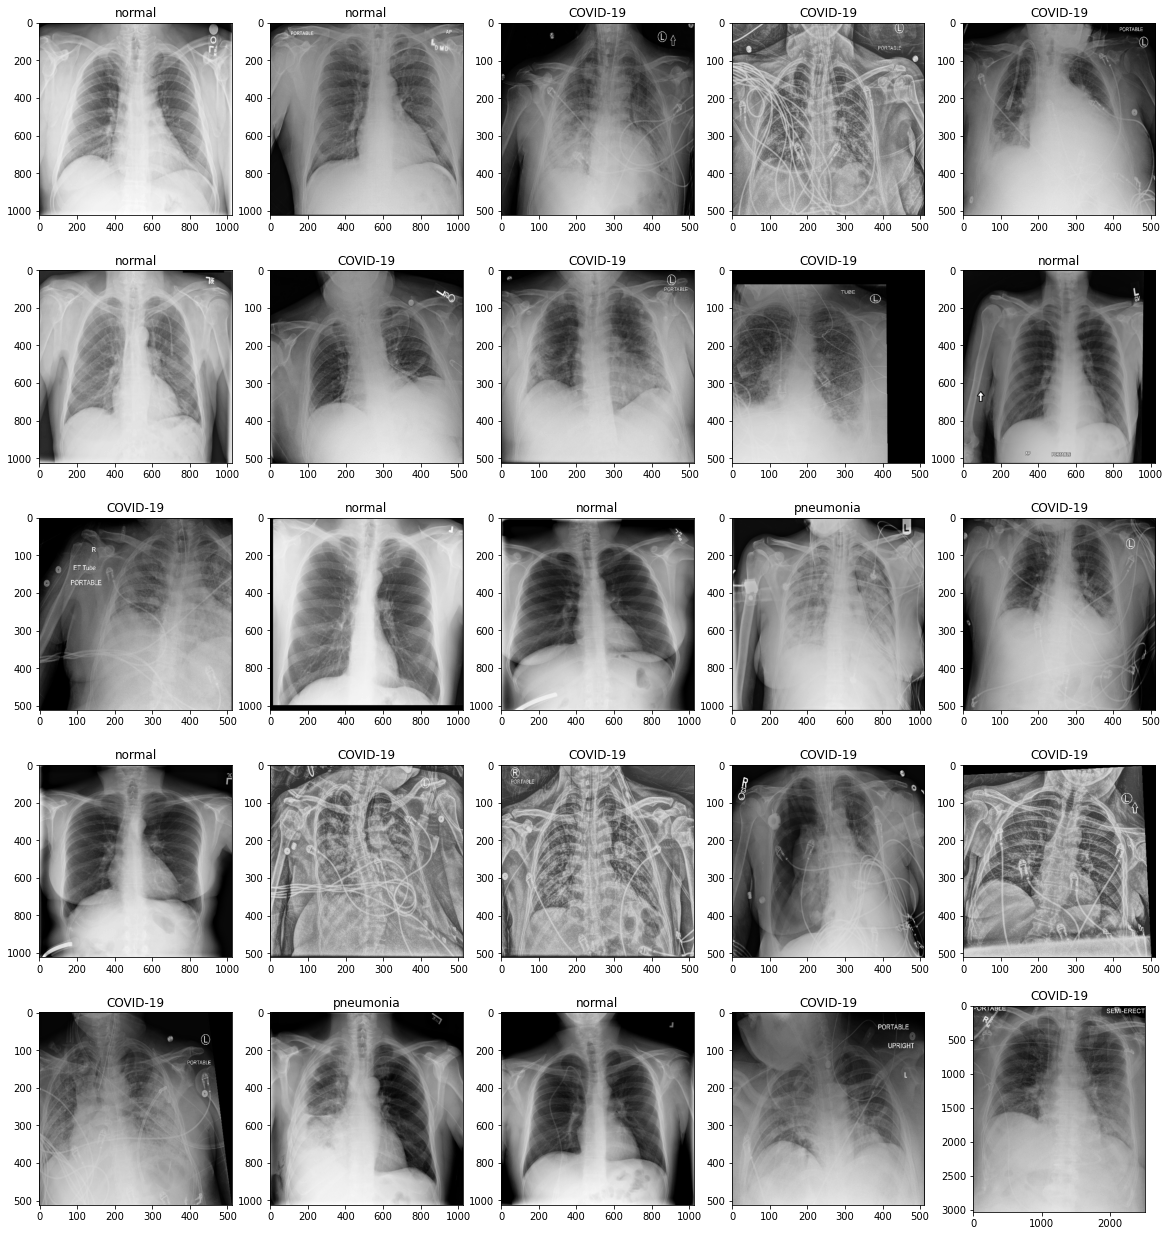

In [ ]:
fig = plt.figure(0, (20,22))

for i, image in enumerate(images):
  fig.add_subplot(5, 5, i+1)
  plt.title(labels[i])
  plt.imshow(image, 'gray')

# Citation



Wang, L., Lin, Z. Q., & Wong, A. (2020). COVID-Net: a tailored deep convolutional neural network design for detection of COVID-19 cases from chest X-ray images. Scientific Reports, 10(1), 19549. doi:10.1038/s41598-020-76550-z